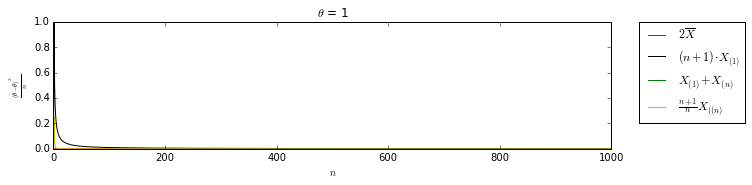

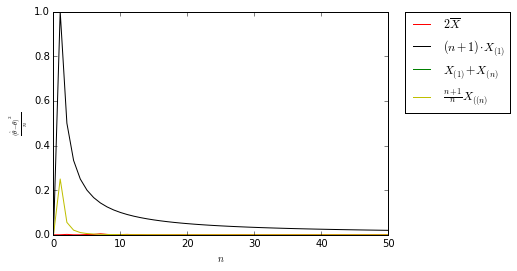

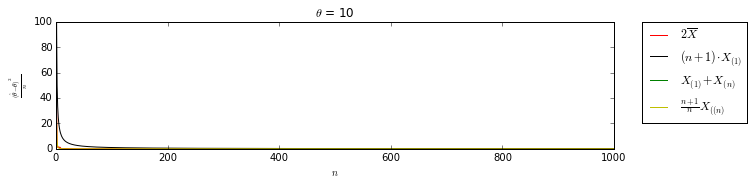

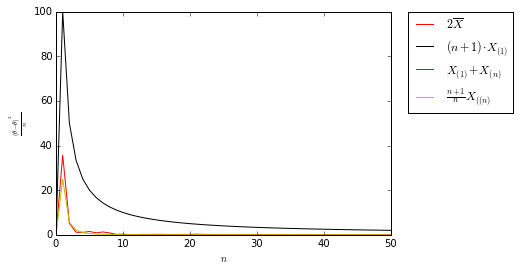

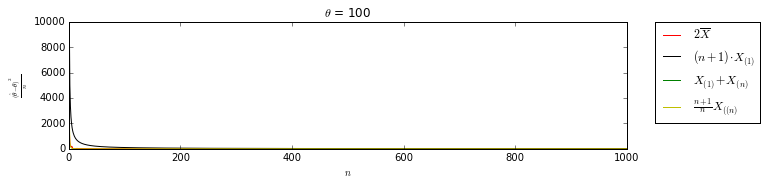

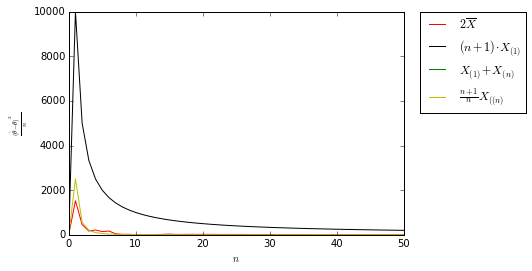

ok


In [2]:
import numpy as nmp
import scipy as scp
import matplotlib.pyplot as plt
#import sympy as sy
from sympy import Symbol
%matplotlib inline 

#
M = 100
N = 10000
arg = 1
Axis_X = nmp.arange(0, N + 1, 1)

# для аргументов от 1 до 1000 с шагом 10 выполняем:
while (arg != 1000):
    
    colors = ['-r', '-k', '-g', '-y']
    labels = ["$2\overline{X}$", "$(n + 1) \cdot X_{(1)}$", 
              "$X_{(1)} + X_{(n)}$", "$\\frac{n + 1}{n}X_{((n)} $"]
    
    def draw_graphics(l_func, colors, label):
        plt.plot(Axis_X, l_func, colors, label=label)

    # Генерируем 100 выборок по 1000 элемента. Всё хранится в 
    # двумерном массиве (N + 1, потому что границы не включены, а нужно ровно N)
    Samples = nmp.zeros([M, N + 1])
    for k in range(M):
        Samples[k, ] = nmp.random.uniform(0, arg, N + 1)

    # Подготовительные работы для подсчета оценок
    Estimate_1 = nmp.zeros([M, N + 1])  # 2\overline{X}
    Estimate_2 = nmp.zeros([M, N + 1])  # (n + 1)X_{(1)}
    Estimate_3 = nmp.zeros([M, N + 1])  # X_{(1)} + X_{(n)}
    Estimate_4 = nmp.zeros([M, N + 1])  # (n + 1)/n * X_{(n)}
    Sum = 0
    X_first = 0
    X_last = arg
    index = 0

    # Для каждого n <= 1000 считаем оценки параметра theta
    for j in range(M):
        for n in range(1, N + 1):
            Sum = Sum + Samples[j, index]
            X_first = min(X_first, Samples[j, index])
            X_last = max(X_last, Samples[j, index])
            Estimate_1[j, index] = Sum / n * 2
            Estimate_2[j, index] = (n + 1) * X_first
            Estimate_3[j, index] = X_first + X_last
            Estimate_4[j, index] = ((n + 1) / n) * X_last
            index = index + 1
        index = 0

    # Считаем квадратичную функцию потерь. Массивы для каждой оценки
    # хранят усредненное значение функции в ячейке с номером, равным фиксированному n
    L_func_1 = nmp.zeros([M, N + 1])
    L_func_2 = nmp.zeros([M, N + 1])
    L_func_3 = nmp.zeros([M, N + 1])
    L_func_4 = nmp.zeros([M, N + 1])
    for j in range(0, M):    
        for i in range(1, N + 1):
            L_func_1[j, i] = pow(Estimate_1[j, i] - arg, 2) / i
            L_func_2[j, i] = pow(Estimate_2[j, i] - arg, 2) / i
            L_func_3[j, i] = pow(Estimate_3[j, i] - arg, 2) / i
            L_func_4[j, i] = pow(Estimate_4[j, i] - arg, 2) / i

    functions = [L_func_1[0, ], L_func_2[0, ], 
                 L_func_3[0, ], L_func_4[0, ]]
    
    # Строим графики зависимости усредненной квадратичной функции потерь 
    # от n для каждой оценки для каждого значения параметра    
    plt.figure(figsize = (10, 5))
    plt.subplot(2, 1, 1)
    plt.title("$\\theta$ = " + str(arg)) 
    
    # Ограничим ось ОХ 1000, чтобы было видно, что происходит в начале функций 
    #  при n = 1000 видно, что функция стремится к нулю
    plt.axis([0, 1000, 0, max(max(functions[0]), max(functions[1]), max(functions[2]), max(functions[3]))])
    for l in range(4):
        draw_graphics(functions[l], colors[l], labels[l])
    plt.xlabel("$n$")
    plt.ylabel("$\\frac{{(\hat{\\theta} - \\theta)}^2}{n}$")
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.show()
    
    #приблизим ещё сильнее
    plt.axis([0, 50, 0, max(max(functions[0]), max(functions[1]), max(functions[2]), max(functions[3]))])
    for l in range(4):
        draw_graphics(functions[l], colors[l], labels[l])
    plt.xlabel("$n$")
    plt.ylabel("$\\frac{{(\hat{\\theta} - \\theta)}^2}{n}$")
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.show()
    
    arg = arg * 10
    
    
print("ok")